**MID EXAM Computer Vision**

**Nomor 1**

Nama  : Rio Pramana

NIM   : 2440016804

Kelas : LA01

Penjelasan akan diberikan pada markdown cell dan juga comment pada code

# Idea of histogram matching

In this question, we are trying to unify the contrast level of both images by modifying the input image based on the contrast of the reference image

That can be done by applying a histogram matching algorithm

To apply histogram matching, we need to calculate the histogram of both images and equalize them. To get the equalized histogram, we can calculate the cumulative distribution function (CDF) of both images' histogram. Then, we can map each pixel of the input image to the reference image using both images' equalized histogram. This mapping will help us modify input image's pixels to match the contrast of reference image

Illustration:
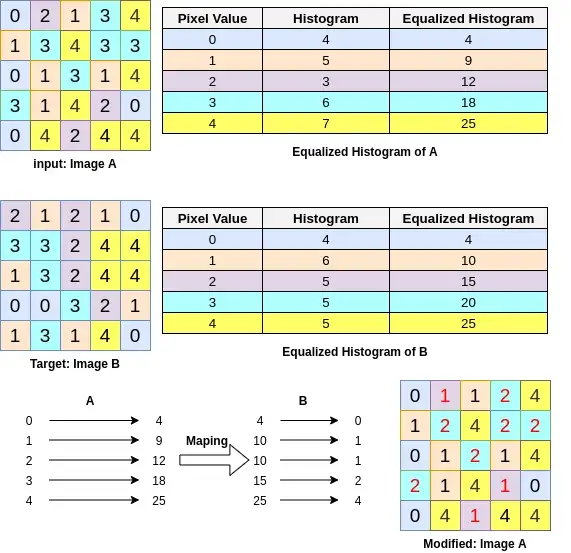

Reference for the illustration above: https://towardsdatascience.com/histogram-matching-ee3a67b4cbc1

# Implementing Histogram Matching

## Import libraries

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

## Load images

This code block assumes that both images are in the same folder as the .ipynb file

In [2]:
#Load image from files
input_img = cv2.imread('input_image.jpg')
ref_img = cv2.imread('reference.jpg')

Visualize both images:

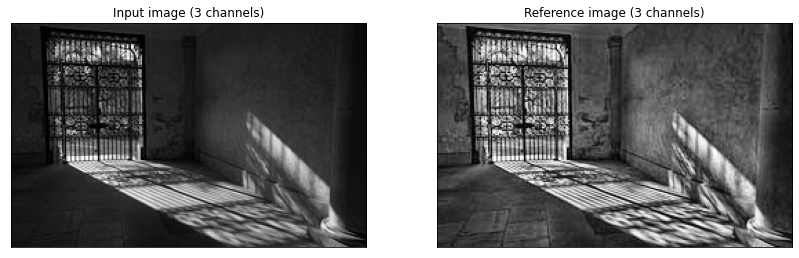

In [3]:
# Display the images
fig = plt.figure(figsize=(14,10))
# First image
plt.subplot(121),plt.imshow(input_img)
plt.title('Input image (3 channels)'), plt.xticks([]), plt.yticks([])
# Second image
plt.subplot(122),plt.imshow(ref_img)
plt.title('Reference image (3 channels)'), plt.xticks([]), plt.yticks([])
plt.show()

In [4]:
print(input_img.shape, ref_img.shape)

(163, 258, 3) (163, 258, 3)


As we can see from the shape, both images still have 3 channels

It is unnecessary for our case, so we will remove it by transforming the image into grayscale image

In [5]:
# Convert the images into grayscale
input_img_gray = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
ref_img_gray = cv2.cvtColor(ref_img, cv2.COLOR_BGR2GRAY)

Visualizing both images after transformed into grayscale:

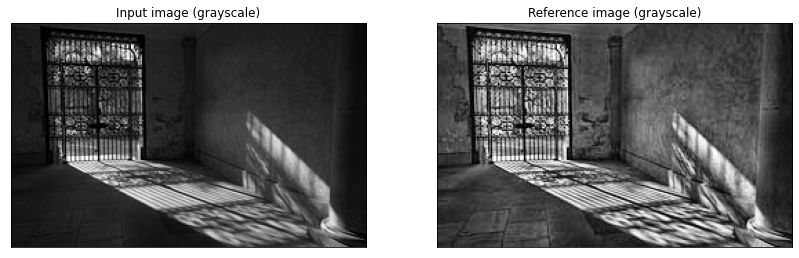

In [6]:
# Display the images
fig = plt.figure(figsize=(14,10))
# First image
plt.subplot(121),plt.imshow(input_img_gray, cmap = 'gray')
plt.title('Input image (grayscale)'), plt.xticks([]), plt.yticks([])
# Second image
plt.subplot(122),plt.imshow(ref_img_gray, cmap = 'gray')
plt.title('Reference image (grayscale)'), plt.xticks([]), plt.yticks([])
plt.show()

In [7]:
print(input_img_gray.shape, ref_img_gray.shape)

(163, 258) (163, 258)


## Visualizing both images' histogram (before and after equalizing)

In [8]:
# Define function to calculate histogram of an image
def getHistogram(img):
    intensity = np.zeros((256))
    height, width = img.shape
    for i in range(height):
        for j in range(width):
            intensity[round(img[i][j])] += 1
            
    return intensity

Visualize histogram before equalizing:

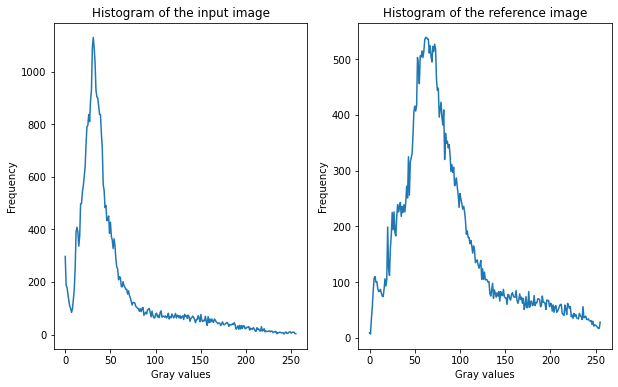

In [9]:
#Calculate histogram of input image & reference image..
#..using the getHistogram() user-defined function
input_img_hist = getHistogram(input_img_gray)
ref_img_hist = getHistogram(ref_img_gray)

fig = plt.figure(figsize=(10, 6))

#Plot the input image histogram on the left
plt.subplot(121)
plt.plot(input_img_hist)
plt.title('Histogram of the input image')
plt.xlabel('Gray values')
plt.ylabel('Frequency')

#Plot the reference image histogram on the right
plt.subplot(122)
plt.plot(ref_img_hist)
plt.title('Histogram of the reference image')
plt.xlabel('Gray values')
plt.ylabel('Frequency')

plt.show()

Visualize image & histogram after equalizing:

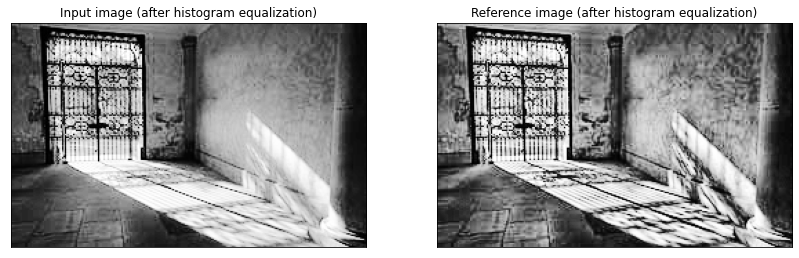

In [10]:
# Using .equalizeHist() from opencv to equalize both images
# This is for visualization purpose, I will use a different function..
#..for equalizing the histogram later on for histogram matching purpose
input_img_equalized = cv2.equalizeHist(input_img_gray)
ref_img_equalized = cv2.equalizeHist(ref_img_gray)

# Display the images
fig = plt.figure(figsize=(14,10))
# First image
plt.subplot(121),plt.imshow(input_img_equalized, cmap = 'gray')
plt.title('Input image (after histogram equalization)'), plt.xticks([]), plt.yticks([])
# Second image
plt.subplot(122),plt.imshow(ref_img_equalized, cmap = 'gray')
plt.title('Reference image (after histogram equalization)'), plt.xticks([]), plt.yticks([])
plt.show()

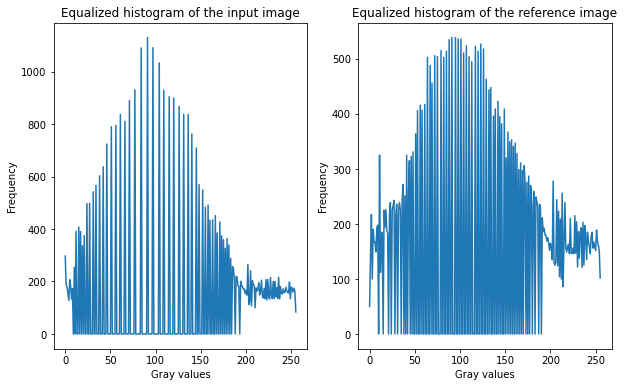

In [11]:
#Calculate histogram of input image (after equalized) & reference image (after equalized)
input_img_eq_hist = getHistogram(input_img_equalized)
ref_img_eq_hist = getHistogram(ref_img_equalized)

fig = plt.figure(figsize=(10, 6))

#Plot the input image histogram on the left
plt.subplot(121)
plt.plot(input_img_eq_hist)
plt.title('Equalized histogram of the input image')
plt.xlabel('Gray values')
plt.ylabel('Frequency')

#Plot the reference image histogram on the right
plt.subplot(122)
plt.plot(ref_img_eq_hist)
plt.title('Equalized histogram of the reference image')
plt.xlabel('Gray values')
plt.ylabel('Frequency')

plt.show()

## Match histogram

Define functions to help match histogram:

In [12]:
#Function for calculating cdf of a histogram
def cdfOfHistogram(hist):
    # Get the cumulative sum of the elements
    cdf = hist.cumsum()
 
    # Normalize the cdf
    normalized_cdf = cdf / float(cdf.max())
 
    return normalized_cdf

#Function for calculating lookup table to help the mapping process
def getLookupTable(input_cdf, ref_cdf):
    lookup_table = np.zeros(256)
    lookup_val = 0
    # Iterasi setiap pixel pada equalized histogram input image
    for input_pixel_val in range(len(input_cdf)):
        # Cari nearest value pada equalized histogram reference image
        for ref_pixel_val in range(len(ref_cdf)):
            if ref_cdf[ref_pixel_val] >= input_cdf[input_pixel_val]:
                lookup_val = ref_pixel_val
                break
        lookup_table[input_pixel_val] = lookup_val
    return lookup_table

Match histogram:

In [13]:
# Hitung cdf dari histogram kedua image untuk melakukan equalization
input_cdf_gray = cdfOfHistogram(input_img_hist)
ref_cdf_gray = cdfOfHistogram(ref_img_hist)

# Kalkulasi lookup tablenya untuk mapping
lookup_table = getLookupTable(input_cdf_gray, ref_cdf_gray)
    
# Gunakan .LUT() dari opencv untuk transform input image..
#..berdasarkan lookup table/mapping yang telah dibuat
final_img = cv2.LUT(input_img_gray, lookup_table)

# Kalkulasi histogram final image
new_hist = getHistogram(final_img)

Visualisasi hasil akhir histogram matching:

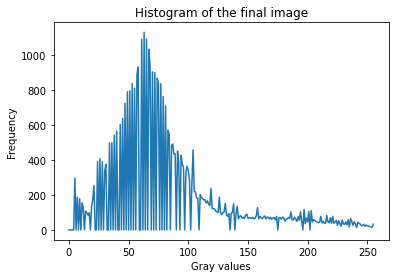

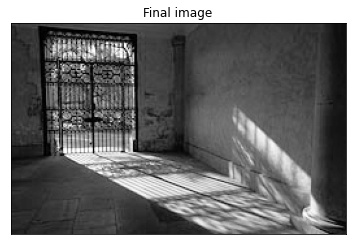

In [14]:
#Plot the final image histogram on the top
fig = plt.figure()
plt.plot(new_hist)
plt.title('Histogram of the final image')
plt.xlabel('Gray values')
plt.ylabel('Frequency')

#Plot the final image on the bottom
fig = plt.figure()
plt.imshow(final_img, cmap = 'gray')
plt.title('Final image'), plt.xticks([]), plt.yticks([])

plt.show()

## Show side-by-side the output image and the reference image

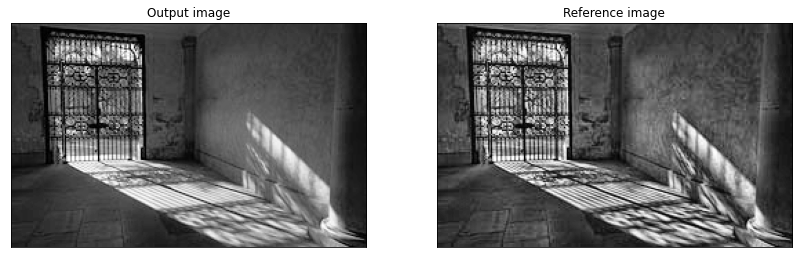

In [15]:
# Display the images
fig = plt.figure(figsize=(14,10))
# Output/final image
plt.subplot(121),plt.imshow(final_img, cmap = 'gray')
plt.title('Output image'), plt.xticks([]), plt.yticks([])
# Reference image
plt.subplot(122),plt.imshow(ref_img_gray, cmap = 'gray')
plt.title('Reference image'), plt.xticks([]), plt.yticks([])
plt.show()